In [ ]:
#Import different libraries
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Input, Activation, Dropout, Flatten, Dense, Reshape
from keras.models import  Model
from numpy import load
import os
import numpy as np
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#Mounting with Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Loading benign and malware data. i.e matrix of shape, (5500,256x256)
Xbenign = load('/content/gdrive/My Drive/Research-Adverserial_ML/P9:Malware_Detection_Based_on_CNN/Datasets/benign_matrix_updated.npy')[:5500]
Xmalware = load('/content/gdrive/My Drive/Research-Adverserial_ML/P9:Malware_Detection_Based_on_CNN/Datasets/malware_matrix_updated.npy')[:5500]

print(Xbenign.shape)
print(Xmalware.shape)

#combine both benign and malware in one mamtrix 'X'.
X = np.vstack([Xbenign, Xmalware])
X = X[..., np.newaxis]
print(X.shape)

(5500, 256, 256)
(5500, 256, 256)
(11000, 256, 256, 1)


In [ ]:
# making of labels(Y)
benign_Y = np.zeros(Xbenign.shape[0], dtype=np.int16)
malware_Y = np.ones(Xmalware.shape[0], dtype=np.int16)
Y = np.hstack((benign_Y, malware_Y))
print(Y.shape)
print(Y)

(11000,)
[0 0 0 ... 1 1 1]


In [ ]:
#Split the data to train set (75% + 10% of validation set) and test sets (15%0.
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.20)

visible = Input(shape=(256,256,1))
conv1 = Conv2D(filters=64, kernel_size=(8,256), activation='relu', data_format='channels_last')(visible)
print(conv1.shape)
conv1 = ZeroPadding2D(padding=[(0, 7), (0,0)])(conv1)
conv1 = tf.reshape(conv1, [1,256,64,1])
print(conv1.shape)

conv2 = Conv2D(filters=64, kernel_size=(8,64) , activation='relu', data_format='channels_last')(conv1)
print(conv2.shape)
conv2 = ZeroPadding2D(padding=[(0,7), (0,0)])(conv2)
conv2 = tf.reshape(conv2, [1,256,64,1])
print(conv2.shape)


pool1 = MaxPooling2D((256,1))(conv2) #the output shape must be 64x1
print(pool1.shape)

flat = Flatten()(pool1)
hidden1 = Dense(16, activation='relu')(flat)
output = Dense(2, activation='softmax')(hidden1)
model = Model(inputs=visible, outputs=output)

In [ ]:
#Building the model details are provided by authors.
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(8,256), activation='relu', data_format='channels_last', input_shape=(256,256,1)))
model.add(ZeroPadding2D(padding=[(0, 7), (0,0)]))
model.add(Reshape([256,64,1]))

model.add(Conv2D(filters=64, kernel_size=(8,64) , activation='relu', data_format='channels_last'))
model.add(ZeroPadding2D(padding=[(0, 7), (0,0)]))
model.add(Reshape([256,64,1]))

model.add(MaxPooling2D(pool_size=(256,1))) #the output shape must be 64x1
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 249, 1, 64)        131136    
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 256, 1, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 256, 64, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 249, 1, 64)        32832     
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 256, 1, 64)        0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 256, 64, 1)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 64, 1)          0

In [ ]:
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#train the model.
history = model.fit(trainX, trainY, validation_split=0.10, batch_size=64, epochs=20)

Epoch 1/20
124/124 [==============================] - 2s 17ms/step - loss: 0.3551 - accuracy: 0.8319 - val_loss: 0.1850 - val_accuracy: 0.9295
Epoch 2/20
124/124 [==============================] - 2s 14ms/step - loss: 0.1469 - accuracy: 0.9480 - val_loss: 0.1118 - val_accuracy: 0.9693
Epoch 3/20
124/124 [==============================] - 2s 14ms/step - loss: 0.1020 - accuracy: 0.9688 - val_loss: 0.0993 - val_accuracy: 0.9716
Epoch 4/20
124/124 [==============================] - 2s 14ms/step - loss: 0.0729 - accuracy: 0.9792 - val_loss: 0.0947 - val_accuracy: 0.9750
Epoch 5/20
124/124 [==============================] - 2s 14ms/step - loss: 0.0617 - accuracy: 0.9816 - val_loss: 0.0994 - val_accuracy: 0.9693
Epoch 6/20
124/124 [==============================] - 2s 14ms/step - loss: 0.0556 - accuracy: 0.9837 - val_loss: 0.0875 - val_accuracy: 0.9739
Epoch 7/20
124/124 [==============================] - 2s 14ms/step - loss: 0.0417 - accuracy: 0.9894 - val_loss: 0.0999 - val_accuracy: 0.9625

In [ ]:
#Accuracy on test set.
model.evaluate(testX, testY)

69/69 [==============================] - 0s 6ms/step - loss: 0.1028 - accuracy: 0.9741


[0.10283979028463364, 0.9740909337997437]

In [ ]:
predictions = model.predict(testX)
y_predict = predictions.reshape((predictions.shape[0]))

No handles with labels found to put in legend.


NN: auc=0.995


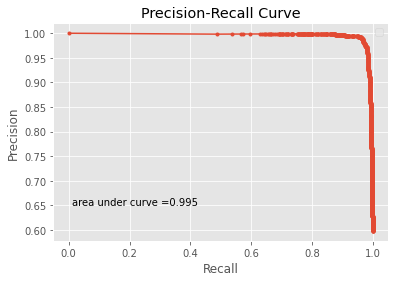

Threshold for splitting benign and malware is :  0.83915263


In [ ]:
from matplotlib import style
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

precision, recall, thresholds = precision_recall_curve(testY, y_predict)
area_uc = auc(recall, precision)
# summarize scores

print('NN: auc=%.3f' % (area_uc))
# plot the precision-recall curves
#no_skill = len(y_test[y_test==1]) / len(y_test)
style.use('ggplot')

pyplot.plot(recall, precision, marker='.')
pyplot.plot()
# axis labels
pyplot.text(0.01,0.65, 'area under curve =%.3f' % (area_uc))
pyplot.title('Precision-Recall Curve')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
prcsn = np.array(precision)
recl = np.array(recall)
f1_measure = 2*(prcsn*recl)/(prcsn+recl)
threshold = thresholds[np.argmax(f1_measure)]
print('Threshold for splitting benign and malware is : ',threshold)


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = np.zeros_like(y_predict)
y_idx = [y_predict >= 0.5]
y_pred[y_idx] = 1
conf_mtrx = confusion_matrix(testY, y_pred)
print(conf_mtrx)

[[1032   28]
 [  29 1111]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


In [ ]:
def different_evaluations(tn, fp, fn, tp, y_test, y_pred):
  # FPr and RNr
  FPr = fp/ (fp+tn)
  FNr = fn/ (fn+tp)
  print("False positive rate is : ", FPr)
  print("False negative rate is : ", FNr)
  # F1-score
  print("The F1-score is : ", f1_score(y_test, y_pred))

  # Recall
  print("The Recall is : ", recall_score(y_test, y_pred))

  # Precision
  print("The Precision score is : ", precision_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

tn, fp, fn, tp = conf_mtrx.ravel()

different_evaluations(tn, fp, fn, tp, testY, y_pred)

False positive rate is :  0.026415094339622643
False negative rate is :  0.02543859649122807
The F1-score is :  0.974989030276437
The Recall is :  0.974561403508772
The Precision score is :  0.9754170324846356


In [ ]:
test_X = load('/content/gdrive/My Drive/Research-Adverserial_ML/P9:Malware_Detection_Based_on_CNN/Perturb_Examples/533_normal_diff.npy')
test_X = test_X[..., np.newaxis]
print(test_X.shape)

(533, 256, 256, 1)


In [ ]:
test_y = np.ones((533), dtype=np.int16)

In [ ]:
model.evaluate(test_X, test_y)

17/17 [==============================] - 1s 56ms/step - loss: 0.1560 - accuracy: 0.9700


[0.15600748360157013, 0.9699812531471252]

In [ ]:
AEs_y = np.ones((100), dtype=np.int16)
print(AEs_y.shape)

(100,)


In [ ]:
AEs_X = load('/content/gdrive/My Drive/Research-Adverserial_ML/AEs_Generations/AEs_with_GANs/Samples_Generated_DCGAN/AEs/Attack_On_P9:Malware_Detection_BasedOn_CNN/100AEs_PerturbByA2_0.1%.npy')
AEs_X = AEs_X[..., np.newaxis]

In [ ]:
model.evaluate(AEs_X, AEs_y)

4/4 [==============================] - 0s 5ms/step - loss: 1.7058 - accuracy: 0.6400


[1.7057549953460693, 0.6399999856948853]

In [ ]:
0.63, 0.65, 0.57||0.5, 0.47, 0.46, 0.46, 0.40, 0.41